<a href="https://colab.research.google.com/github/ruchithapatha/Deep-Learning-Projects/blob/main/Project_ML_admissiom_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop(columns=['Serial No.'])
data.head(10)

FileNotFoundError: ignored

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# checking for missing data
data.isnull().sum()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# rename some columns
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'university_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)
data.describe()

,GRE,TOEFL,university_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


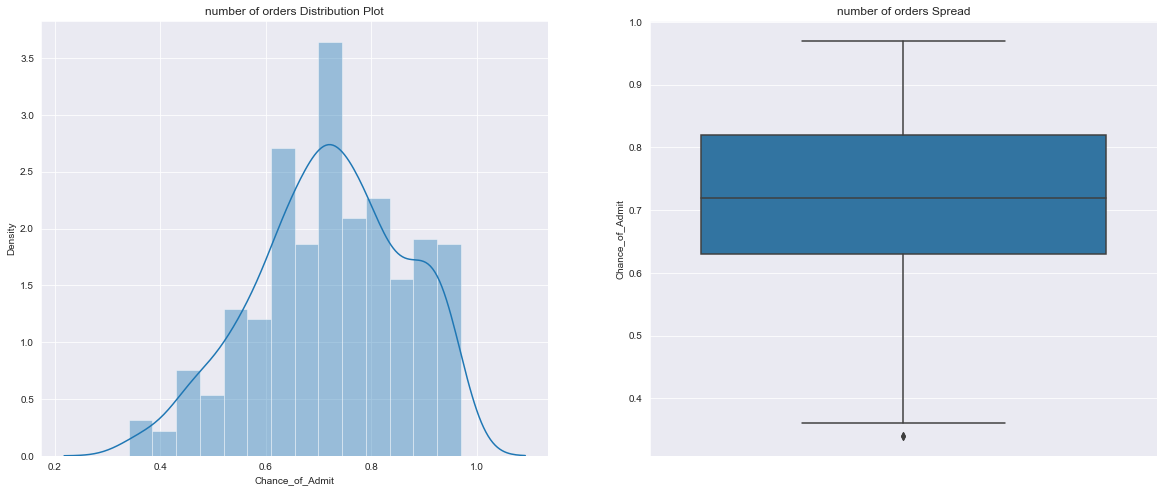

In [ ]:
# visualize the target variable
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit )

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='university_Rating', ylabel='Chance_of_Admit'>

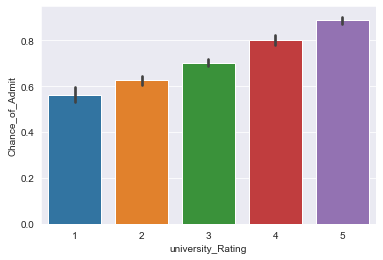

In [ ]:
sb.barplot(data.university_Rating,data.Chance_of_Admit)

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE', ylabel='Chance_of_Admit'>

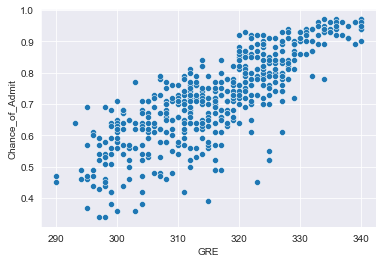

In [ ]:
sb.scatterplot(data.GRE,data.Chance_of_Admit)

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL', ylabel='Chance_of_Admit'>

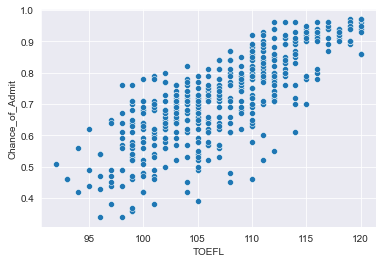

In [ ]:
sb.scatterplot(data.TOEFL,data.Chance_of_Admit)

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA', ylabel='Chance_of_Admit'>

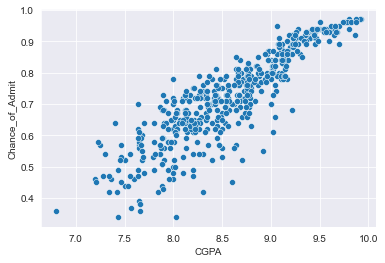

In [ ]:
sb.scatterplot(data.CGPA,data.Chance_of_Admit)

In [ ]:
#From the above scatter plots, you notice taht as the GRE,CGPA and TOEFL increase the change of getting the admission 
#increase too, there is a linear relationship between them.

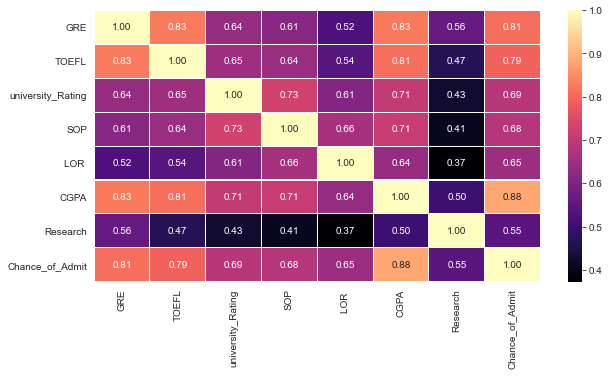

In [ ]:
# looking for relevant independent variable

plt.figure(figsize=(10,5))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [ ]:
(data.corr()**2)["Chance_of_Admit"].sort_values(ascending = False)[1:]

CGPA                 0.778652
GRE                  0.656668
TOEFL                0.627625
university_Rating    0.476283
SOP                  0.468043
LOR                  0.416495
Research             0.297975
Name: Chance_of_Admit, dtype: float64

In [ ]:
#The top 4 independent variable correlated to the target variable are CGPA,GRE,TOEFL and University Ranting.

In [ ]:
# Performing some transformation 
data['Chance_of_Admit']=data['Chance_of_Admit']**2

In [ ]:
# remove some outliers
## Deleting those some outliers. 
# previous_data = data.copy()
data = data[data.Chance_of_Admit >0.40]
data.reset_index(drop = True, inplace = True)

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


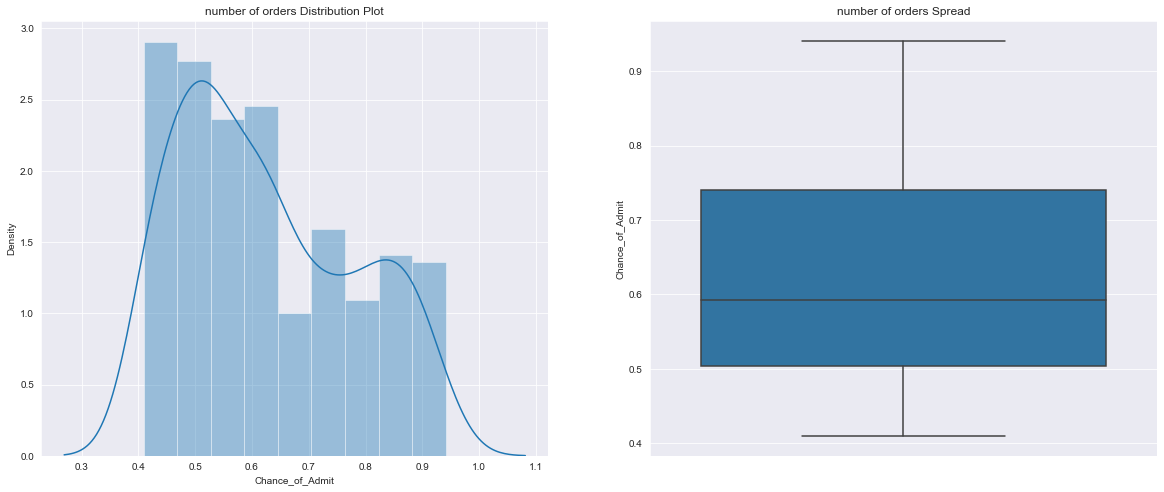

In [ ]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


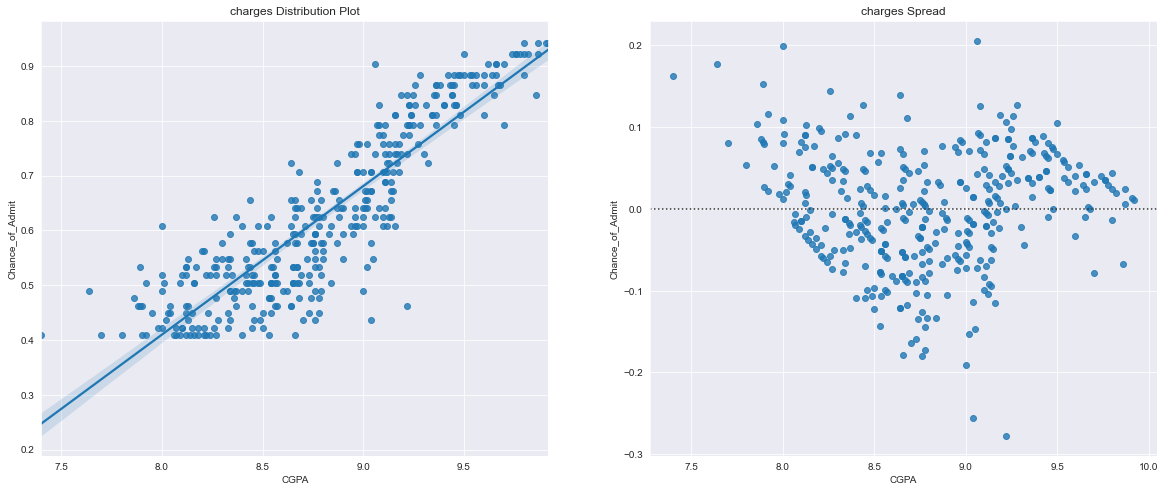

In [ ]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.CGPA, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.CGPA, data.Chance_of_Admit)

plt.show()


c:\users\ruchitha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


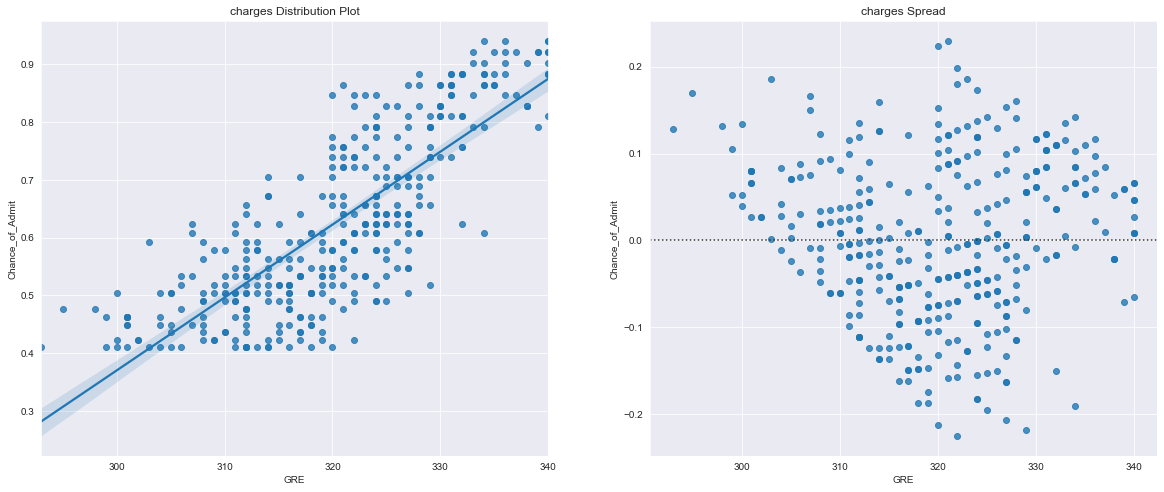

In [ ]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.GRE, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.GRE, data.Chance_of_Admit)

plt.show()

In [ ]:
#From the above plot, we can see that there is not heterosedasticity between the target var and some independents variable.

In [ ]:
data.columns

Index(['GRE', 'TOEFL', 'university_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [ ]:
# data=data.drop(columns=['SOP','LOR ','Research'],axis=1)
x = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# using pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.81879306 0.18120694]


In [ ]:
# Fitting linear regression Regression to the dataset
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression(normalize=True)
Lin_regressor.fit(X_train, y_train)
y_pred=Lin_regressor.predict(X_test)
y_train_pred=Lin_regressor.predict(X_train)

In [ ]:
#the accuracy.std() is low which means our variance is low whats is good

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import r2_score
print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred)*100)

RMSE score on the test set: 0.0645863666027836
RMSE score on the training set: 0.06203539516763837
R2 score on the test set: 82.29216489905946
R2 score on the training set: 83.42041387182823


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RDF_regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
RDF_regressor.fit(X_train, y_train)
y_pred2=RDF_regressor.predict(X_test)
y_train_pred2=RDF_regressor.predict(X_train)
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred2)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred2)))

print("R2 score on the test set:",r2_score(y_test, y_pred2)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred2)*100)

RMSE score on the test set: 0.061610449488461054
RMSE score on the training set: 0.024002252968227302
R2 score on the test set: 83.88640229176667
R2 score on the training set: 97.51801817850674


In [ ]:
#The linear regression perform better !, the rmse difference between the test set and the training set of the linear regression is very small compared to the one of random forest regression.

In [ ]:
# cross validation
# Applying k-Fold Cross Validation USED TO JUST IMPROVE THE MODEL PERFORMANCE(ACCURACY)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Lin_regressor, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(),accuracies.std())

0.8205816154821273 0.041702762979747496


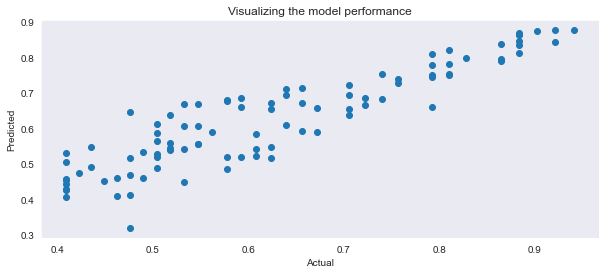

In [ ]:
plt.figure(figsize=(10,4))
sb.set_style('darkgrid')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()